In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from scipy.signal import fftconvolve, gaussian
import torch
from tqdm import trange

from dino.game import DinoGame
from dino.agent import DinoAgent
import rl.training as T
from rl.replay_buffer import ReplayBuffer, PrioritizedReplayBuffer

from IPython.display import clear_output

pygame 2.5.2 (SDL 2.28.2, Python 3.11.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
agent_save_path = 'dino.pkl'

lr = 1e-4
batch_size = 128
device = torch.device('cpu')
timesteps_per_epoch = 1
max_grad_norm = 50

refresh_target_network_freq = 1000
loss_freq = 50
eval_freq = 5000

In [3]:
def make_env():
    return DinoGame()

env = make_env()
agent = DinoAgent(state_dim=env.state_dim, epsilon=0.3).to(device)

In [4]:
exp_replay = PrioritizedReplayBuffer(size=10000, alpha=0.9)

In [5]:
opt = torch.optim.Adam(agent.parameters(), lr=lr)

target_network = DinoAgent(state_dim=env.state_dim, epsilon=0.3).to(device)
target_network.load_state_dict(agent.state_dict())

<All keys matched successfully>

In [6]:
mean_rw_history = []
td_loss_history = []
grad_norm_history = []
initial_state_v_history = []

def smoothen(values):
    kernel = gaussian(100, std=100)
    # kernel = np.concatenate([np.arange(100), np.arange(99, -1, -1)])
    kernel = kernel / np.sum(kernel)
    return fftconvolve(values, kernel, 'valid')
# train loop
state = env.reset()
# заполняем replay buffer
T.play_and_record(state, agent, env, exp_replay, batch_size*100)
step = 0

buffer size = 10000, epsilon = 0.30000


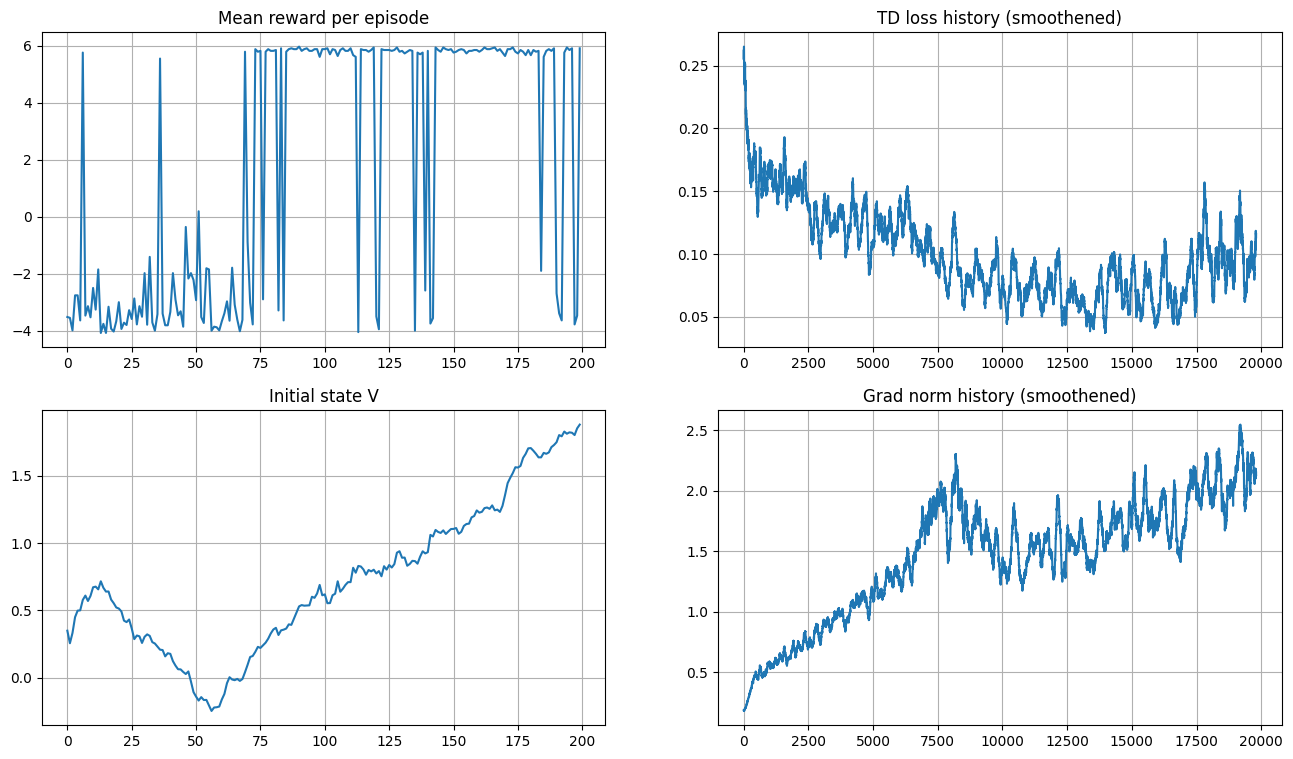

 96% 128891/133880 [05:20<00:48, 102.89it/s]

 96% 128924/133880 [05:20<00:40, 122.90it/s]

 96% 128960/133880 [05:20<00:32, 149.34it/s]

 96% 129007/133880 [05:21<00:25, 193.22it/s]

 96% 129053/133880 [05:21<00:20, 236.78it/s]

 96% 129097/133880 [05:21<00:17, 275.32it/s]

 96% 129143/133880 [05:21<00:15, 314.36it/s]

 96% 129188/133880 [05:21<00:13, 345.94it/s]

 97% 129232/133880 [05:21<00:12, 369.11it/s]

 97% 129278/133880 [05:21<00:11, 391.79it/s]

 97% 129323/133880 [05:21<00:11, 405.54it/s]

 97% 129369/133880 [05:21<00:10, 420.41it/s]

 97% 129415/133880 [05:21<00:10, 429.34it/s]

 97% 129461/133880 [05:22<00:10, 436.50it/s]

 97% 129506/133880 [05:22<00:10, 436.79it/s]

 97% 129552/133880 [05:22<00:09, 442.68it/s]

 97% 129598/133880 [05:22<00:09, 446.78it/s]

 97% 129644/133880 [05:22<00:09, 446.73it/s]

 97% 129690/133880 [05:22<00:09, 448.81it/s]

 97% 129736/133880 [05:22<00:09, 447.00it/s]

 97% 129781/133880 [05:22<00:09, 440.97it/s]

 97% 129827/133880 [05:22<00:09, 445.91it/s]

 97% 129873/133880 [05:23<00:08, 448.54it/s]

 97% 129918/133880 [05:23<00:08, 444.84it/s]

 97% 129963/133880 [05:23<00:08, 443.81it/s]

 97% 130009/133880 [05:23<00:08, 446.57it/s]

 97% 130055/133880 [05:23<00:08, 448.01it/s]

 97% 130101/133880 [05:23<00:08, 450.09it/s]

 97% 130147/133880 [05:23<00:08, 446.46it/s]

 97% 130192/133880 [05:23<00:08, 440.18it/s]

 97% 130237/133880 [05:23<00:08, 443.04it/s]

 97% 130283/133880 [05:23<00:08, 447.83it/s]

 97% 130328/133880 [05:24<00:07, 445.15it/s]

 97% 130374/133880 [05:24<00:07, 447.04it/s]

 97% 130420/133880 [05:24<00:07, 448.55it/s]

 97% 130466/133880 [05:24<00:07, 450.43it/s]

 97% 130512/133880 [05:24<00:07, 447.08it/s]

 98% 130558/133880 [05:24<00:07, 449.44it/s]

 98% 130604/133880 [05:24<00:07, 451.21it/s]

 98% 130650/133880 [05:24<00:07, 451.81it/s]

 98% 130696/133880 [05:24<00:07, 452.33it/s]

 98% 130742/133880 [05:24<00:06, 450.21it/s]

 98% 130788/133880 [05:25<00:06, 451.02it/s]

 98% 130834/133880 [05:25<00:06, 447.26it/s]

 98% 130880/133880 [05:25<00:06, 449.78it/s]

 98% 130926/133880 [05:25<00:06, 450.80it/s]

 98% 130972/133880 [05:25<00:06, 451.04it/s]

 98% 131018/133880 [05:25<00:06, 450.12it/s]

 98% 131064/133880 [05:25<00:06, 451.69it/s]

 98% 131110/133880 [05:25<00:06, 449.81it/s]

 98% 131155/133880 [05:25<00:06, 449.64it/s]

 98% 131201/133880 [05:25<00:05, 451.02it/s]

 98% 131247/133880 [05:26<00:05, 448.94it/s]

 98% 131292/133880 [05:26<00:05, 449.14it/s]

 98% 131339/133880 [05:26<00:05, 452.70it/s]

 98% 131385/133880 [05:26<00:05, 450.21it/s]

 98% 131431/133880 [05:26<00:05, 451.67it/s]

 98% 131477/133880 [05:26<00:05, 451.67it/s]

 98% 131523/133880 [05:26<00:05, 452.67it/s]

 98% 131569/133880 [05:26<00:05, 449.58it/s]

 98% 131615/133880 [05:26<00:05, 452.01it/s]

 98% 131661/133880 [05:26<00:04, 452.66it/s]

 98% 131707/133880 [05:27<00:04, 451.62it/s]

 98% 131753/133880 [05:27<00:04, 452.08it/s]

 98% 131799/133880 [05:27<00:04, 452.51it/s]

 98% 131845/133880 [05:27<00:04, 440.34it/s]

 99% 131890/133880 [05:27<00:04, 435.45it/s]

 99% 131936/133880 [05:27<00:04, 441.30it/s]

 99% 131982/133880 [05:27<00:04, 444.12it/s]

 99% 132027/133880 [05:27<00:04, 443.79it/s]

 99% 132073/133880 [05:27<00:04, 448.03it/s]

 99% 132118/133880 [05:28<00:03, 445.42it/s]

 99% 132164/133880 [05:28<00:03, 447.91it/s]

 99% 132210/133880 [05:28<00:03, 449.07it/s]

 99% 132255/133880 [05:28<00:03, 448.17it/s]

 99% 132301/133880 [05:28<00:03, 449.67it/s]

 99% 132346/133880 [05:28<00:03, 449.32it/s]

 99% 132392/133880 [05:28<00:03, 450.10it/s]

 99% 132438/133880 [05:28<00:03, 446.36it/s]

 99% 132483/133880 [05:28<00:03, 446.04it/s]

 99% 132528/133880 [05:28<00:03, 445.62it/s]

 99% 132574/133880 [05:29<00:02, 448.83it/s]

 99% 132620/133880 [05:29<00:02, 450.04it/s]

 99% 132666/133880 [05:29<00:02, 449.65it/s]

 99% 132711/133880 [05:29<00:02, 449.33it/s]

 99% 132757/133880 [05:29<00:02, 450.77it/s]

 99% 132803/133880 [05:29<00:02, 448.95it/s]

 99% 132848/133880 [05:29<00:02, 448.93it/s]

 99% 132894/133880 [05:29<00:02, 450.11it/s]

 99% 132940/133880 [05:29<00:02, 451.58it/s]

 99% 132986/133880 [05:29<00:01, 452.29it/s]

 99% 133032/133880 [05:30<00:01, 439.19it/s]

 99% 133077/133880 [05:30<00:01, 437.75it/s]

 99% 133123/133880 [05:30<00:01, 442.57it/s]

 99% 133169/133880 [05:30<00:01, 446.39it/s]

100% 133215/133880 [05:30<00:01, 448.76it/s]

100% 133261/133880 [05:30<00:01, 450.09it/s]

100% 133307/133880 [05:30<00:01, 447.10it/s]

100% 133352/133880 [05:30<00:01, 446.53it/s]

100% 133398/133880 [05:30<00:01, 449.88it/s]

100% 133444/133880 [05:30<00:00, 450.71it/s]

100% 133490/133880 [05:31<00:00, 451.85it/s]

100% 133536/133880 [05:31<00:00, 444.80it/s]

100% 133582/133880 [05:31<00:00, 448.90it/s]

100% 133628/133880 [05:31<00:00, 450.64it/s]

100% 133674/133880 [05:31<00:00, 451.09it/s]

100% 133720/133880 [05:31<00:00, 451.62it/s]

100% 133766/133880 [05:31<00:00, 440.78it/s]

100% 133811/133880 [05:31<00:00, 432.80it/s]

100% 133857/133880 [05:31<00:00, 439.27it/s]

100% 133880/133880 [05:31<00:00, 403.30it/s]

In [11]:
try:
    # for step in trange(step, step+1000000):
    for step in trange(step, 1000000):

        # play
        _, state = T.play_and_record(state, agent, env, exp_replay, timesteps_per_epoch)

        # train
        obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch, weights, idxes = exp_replay.sample(batch_size, beta=0.9)

        loss = T.compute_td_loss_weighted(device,
                                          obs_batch, act_batch, reward_batch, next_obs_batch, is_done_batch, weights,
                                          agent, target_network,
                                          gamma=0.99)

        loss.backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(agent.parameters(), max_grad_norm)
        opt.step()
        opt.zero_grad()

        if step % refresh_target_network_freq == 0:
            # Load agent weights into target_network
            target_network.load_state_dict(agent.state_dict())

        if step % loss_freq == 0:
            td_loss_history.append(loss.data.cpu().item())
            grad_norm_history.append(grad_norm)

        if step % refresh_target_network_freq == 0:
            # Load agent weights into target_network
            target_network.load_state_dict(agent.state_dict())

        if step % eval_freq == 0:
            mean_rw_history.append(T.evaluate(
                make_env(), agent, n_games=15, greedy=True, t_max=1000, seed=step)
            )
            initial_state_q_values = agent.get_qvalues(make_env().reset(seed=step)[np.newaxis])
            initial_state_v_history.append(np.max(initial_state_q_values))

            clear_output(True)
            print("buffer size = %i, epsilon = %.5f" % (len(exp_replay), agent.epsilon))

            plt.figure(figsize=[16, 9])

            plt.subplot(2, 2, 1)
            plt.title("Mean reward per episode")
            plt.plot(mean_rw_history)
            plt.grid()

            assert not np.isnan(td_loss_history[-1])
            plt.subplot(2, 2, 2)
            plt.title("TD loss history (smoothened)")
            plt.plot(smoothen(td_loss_history))
            plt.grid()

            plt.subplot(2, 2, 3)
            plt.title("Initial state V")
            plt.plot(initial_state_v_history)
            plt.grid()

            plt.subplot(2, 2, 4)
            plt.title("Grad norm history (smoothened)")
            plt.plot(smoothen(grad_norm_history))
            plt.grid()

            plt.show()

except KeyboardInterrupt:
    # Обрабатываем Ctrl+C
    pass

## Сохраняем веса нейронки

In [12]:
torch.save(agent.state_dict(), agent_save_path)
print(f'Веса нейронной сети сохранены в {agent_save_path}')

Веса нейронной сети сохранены в dino.pkl


In [5]:
agent.load_state_dict(torch.load(agent_save_path))

<All keys matched successfully>